<a href="https://colab.research.google.com/github/mrigankapaul-dhubri/TXTA_Praxis_term2/blob/main/TXTA_Session5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving bbc-fulltext.zip to bbc-fulltext.zip


In [2]:
!unzip  /content/bbc-fulltext.zip 

Archive:  /content/bbc-fulltext.zip
   creating: bbc/
   creating: bbc/business/
  inflating: bbc/business/001.txt    
  inflating: bbc/business/002.txt    
  inflating: bbc/business/003.txt    
  inflating: bbc/business/004.txt    
  inflating: bbc/business/005.txt    
  inflating: bbc/business/006.txt    
  inflating: bbc/business/007.txt    
  inflating: bbc/business/008.txt    
  inflating: bbc/business/009.txt    
  inflating: bbc/business/010.txt    
  inflating: bbc/business/011.txt    
  inflating: bbc/business/012.txt    
  inflating: bbc/business/013.txt    
  inflating: bbc/business/014.txt    
  inflating: bbc/business/015.txt    
  inflating: bbc/business/016.txt    
  inflating: bbc/business/017.txt    
  inflating: bbc/business/018.txt    
  inflating: bbc/business/019.txt    
  inflating: bbc/business/020.txt    
  inflating: bbc/business/021.txt    
  inflating: bbc/business/022.txt    
  inflating: bbc/business/023.txt    
  inflating: bbc/business/024.txt    
  infla

In [3]:
import os, re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
contents = []
global_path = '/content/bbc/'
for folder in ['business','entertainment','politics','sport', 'tech']:
  folder_path = global_path + folder + '/'
  files = sorted(os.listdir(folder_path))
  for file in files:
    file_path = folder_path + file
    with open(file_path, 'r') as f:
      try:
        news_with_heading = f.read()     
        heading = re.search(".*(?=\\n\\n)", news_with_heading).group()
        news = re.sub(heading,'', news_with_heading)
        contents.append((folder, heading, news))
      except:
        print(file_path)
        continue


/content/bbc/sport/199.txt


In [5]:
dataframe = pd.DataFrame.from_records(contents, columns =['topic','headline','news'])
dataframe.head()

,topic,headline,news
0,business,Ad sales boost Time Warner profit,\n\nQuarterly profits at US media giant TimeWa...
1,business,Dollar gains on Greenspan speech,\n\nThe dollar has hit its highest level again...
2,business,Yukos unit buyer faces loan claim,\n\nThe owners of embattled Russian oil giant ...
3,business,High fuel prices hit BA's profits,\n\nBritish Airways has blamed high fuel price...
4,business,Pernod takeover talk lifts Domecq,\n\nShares in UK drinks and food firm Allied D...


In [6]:
only_news = dataframe.news

In [7]:
from wordcloud import STOPWORDS

In [8]:
# Basic preprocessing
corpus = [re.sub("\\n\\n",' ', s) for s in only_news]
corpus = [text.lower() for text in corpus]
corpus = [re.sub("[^a-z ]+", '', s) for s in corpus]
corpus = [text.strip() for text in corpus]

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
tfidf = TfidfVectorizer(stop_words=STOPWORDS,ngram_range=(1,2),
                        max_df=0.7, min_df = 10,
                        token_pattern="[a-z']+")  # first with max_features 200 and then change it to 500

In [11]:
tfidf_mat = tfidf.fit_transform(corpus)

In [12]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse.linalg import svds

In [13]:
U, S, V = svds(tfidf_mat,k =2223)

In [14]:
U.shape, S.shape, V.shape

((2224, 2223), (2223,), (2223, 7006))

In [15]:
S1 = S.copy()
S1.sort()
S2 = S1.copy()
S3 = S2[::-1]

In [16]:
S4 = S3.cumsum()/S3.sum()

In [17]:
sum(S4<0.5)

628

In [18]:
n_dim = 650

In [19]:
tsvd = TruncatedSVD(n_components=628)

In [20]:
tsvd.fit(tfidf_mat)

TruncatedSVD(n_components=628)

In [21]:
tsvd.singular_values_

array([8.64861984, 5.25034603, 4.83193377, 4.46352639, 4.41215491,
       3.71589164, 3.51520229, 3.36116369, 3.35065446, 3.26395947,
       3.22354384, 3.15616117, 3.0472373 , 3.00539069, 2.99384343,
       2.93342711, 2.90004747, 2.8268596 , 2.75712391, 2.72549178,
       2.67885366, 2.65989861, 2.61243473, 2.59488057, 2.55405246,
       2.54454453, 2.52524836, 2.49759988, 2.47280983, 2.43340947,
       2.41956596, 2.3726434 , 2.35058711, 2.33424239, 2.32092416,
       2.30773678, 2.30525451, 2.27812346, 2.26693501, 2.25963336,
       2.23750981, 2.22631938, 2.21843341, 2.18382442, 2.17915591,
       2.17588197, 2.16379152, 2.15215193, 2.14894714, 2.1371253 ,
       2.12528658, 2.12272789, 2.10755886, 2.10039918, 2.09444175,
       2.0905313 , 2.07922838, 2.06283319, 2.05554824, 2.04903397,
       2.03507604, 2.02742318, 2.01664421, 2.00715516, 2.00583022,
       1.99307538, 1.98729863, 1.98283119, 1.97803171, 1.96970202,
       1.96129062, 1.9559038 , 1.95376222, 1.94014937, 1.93481

In [22]:
tsvd_mat = tsvd.transform(tfidf_mat) # U matrix of S

In [23]:
tsvd_word = TruncatedSVD(n_components=628)
tsvd_word_mat = tsvd_word.fit_transform(tfidf_mat.T)  # V matrix of SVD ==> word vector

In [24]:
from sklearn.manifold import TSNE

In [25]:
tsne = TSNE(n_components=2, n_iter=1500, n_jobs = -1)
tsne_mat = tsne.fit_transform(tsvd_mat)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [26]:
import matplotlib.pyplot as plt
from sklearn import preprocessing


In [27]:
topic_num = preprocessing.LabelEncoder().fit_transform(dataframe.topic)

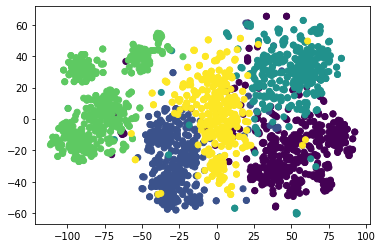

In [28]:
plt.scatter(tsne_mat[:,0],tsne_mat[:,1],c = topic_num)  # shows document cluster

In [29]:
query = 'How about Sony chip design and computer games?'  # 'How about Microsoft/Sony and computer games?   'What about Blair and anti-terror legislation?'

In [30]:
query_doc = tsvd.transform(tfidf.transform([query]))

In [31]:
query_doc.shape

(1, 628)

In [32]:
from sklearn.metrics import pairwise_distances

In [33]:
d = pairwise_distances (X=tsvd_mat, Y=query_doc, metric="cosine")
d1 = np.argsort(d)

In [34]:
sorted(d.flatten())
d

array([[0.99878829],
       [0.98851693],
       [1.00948155],
       ...,
       [0.97966897],
       [0.99372483],
       [0.84161308]])

In [47]:
#dataframe.news[np.argmin(d.flatten())]  #[1926]
dataframe.news[np.argmin(d)] #it gives out the document where the query is matching

'\n\nDetails of the chip designed to power Sony\'s PlayStation 3 console will be released in San Francisco on Monday.\n\nSony, IBM and Toshiba, who have been working on the Cell processor for three years, will unveil the chip at a technology conference. The chip is reported to be up to 10 times faster than current processors. It is being designed for use in graphics workstations, the new PlayStation console, and has been described as a supercomputer on a chip. Sony has said the Cell processor could be used to bridge the gap between movies and video games. Special effects and graphics designed for films could be ported for use directly in a video game, Sony told an audience at the E3 exhibition in Los Angeles last year.\n\nCell could also be marketed as an ideal technology for televisions and supercomputers, and everything in between, said Kevin Krewell, the editor in chief of Microprocessor Report. The chip will be made of several different processing cores that work on tasks together.

In [36]:
word_query = "Toshiba"

In [37]:
tfidf.vocabulary_["toshiba"]

6296

In [38]:
d_word = pairwise_distances(X = tsvd_word_mat, Y = tsvd_word_mat[6267].reshape(1,-1), metric = "cosine")

In [39]:
indices = np.argsort(d_word.flatten())

In [40]:
indices[1:10]

array([4769, 3258, 6005, 1248, 2404,  449, 6003, 1233, 3134])

In [41]:
vocab_reverse = {v:k for k,v  in tfidf.vocabulary_.items()}

In [42]:
vocab_reverse[1766]

'due'

In [43]:
for i in indices[1:10]:
  print(vocab_reverse[i])

purchases
kinds
surveyed
consumers
freely
awareness
survey
constantly
jan
